## Define Class

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [26]:
class Time:
    def __init__(self, date, hour, renthour):
        self.date = date
        self.hour = hour
        self.renthour = renthour

class Slot:
    def __init__(self, location, timestamp):
        self.location = location
        self.timestamp = timestamp

class VirtualReservation:
    def __init__(self, location, date, time):
        self.location = location
        self.date = date
        self.time = time
        
class DatabaseConnection:
    def SearchTimeQuery(self, customer, time, NumSlot):
        start = float(time.hour)
        end = start + float(time.renthour)
        empty_slot = [i for i in range(1,NumSlot+1)]
        for cur in customer:
            if time.date == cur.date: # there are three invalidate cases.
                if cur.time[0] >= start and cur.time[0] < end and cur.location in empty_slot:
                    empty_slot.remove(cur.location)
                if cur.time[1] > start and cur.time[1] <= end and cur.location in empty_slot:
                    empty_slot.remove(cur.location)
                if cur.time[0] <= start and cur.time[1] >= end and cur.location in empty_slot:
                    empty_slot.remove(cur.location)
        return empty_slot

class InsideMaker:
    def Rendering(self, slot, NumSlot):
        fig, ax = plt.subplots()
        plt.title("Inside Map")
        
        for i in range(NumSlot):
            row = i%4
            col = i//4
            ax.add_patch(
                 patches.Rectangle(
                    (1+3*row, 5-2*col),
                    2,
                    1,
                    edgecolor = 'black',
                    facecolor = slot[i].timestamp,
                    fill=True
                 ) )
            
        plt.xlim([0,12])
        plt.ylim([0,6])
        ax.axis('off')
        plt.show()

## Controller

Input date: 21.06.01
Input time: 18.15
Input rent hour: 4


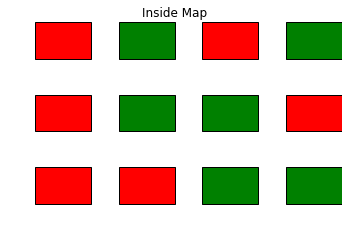

In [27]:
# ==== Make a virtual Database ====
customer = [0 for _ in range(7)]
customer[0] = VirtualReservation(1, "21.06.01", (16.15,20.15))
customer[1] = VirtualReservation(3, "21.06.01", (15.00,18.00))
customer[2] = VirtualReservation(5, "21.06.01", (17.00,19.00))
customer[3] = VirtualReservation(3, "21.06.01", (18.30,19.00))
customer[4] = VirtualReservation(8, "21.06.01", (14.00,19.00))
customer[5] = VirtualReservation(9, "21.06.01", (17.00,21.00))
customer[6] = VirtualReservation(10, "21.06.01", (15.30,19.30))
# ==== Number of Slot in parking lot from virtual DB ====
NumSlot = 12
# =======================================================
date = input("Input date: ")
time = input("Input time: ")
hour = input("Input rent hour: ")

NewTime = Time(date, time, hour)

DB = DatabaseConnection()
EmptySlot = DB.SearchTimeQuery(customer, NewTime, NumSlot)

slot = []
for i in range(1,NumSlot+1):
    if i in EmptySlot:
        slot.append(Slot(i,'green'))
    else:
        slot.append(Slot(i,'red'))

ShowWindow = InsideMaker()
ShowWindow.Rendering(slot,NumSlot)